# Startup Data Challenge - Insights Sustentáveis

### Importar Dados:

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from scipy import stats

In [2]:
# Nome do ficheiro Parquet (assumindo que está na mesma pasta)
file_path = os.path.join(os.getcwd(), 'dados_sensores_5000.parquet')

# Verificar se o arquivo existe e se temos permissões de leitura
if os.path.exists(file_path) and os.access(file_path, os.R_OK):
    try:
        # Ler o ficheiro Parquet
        df = pd.read_parquet(file_path, engine='fastparquet')
        print("Arquivo lido com sucesso.")
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
else:
    print("Erro: Arquivo não encontrado ou sem permissões de leitura.")

Arquivo lido com sucesso.


### Analisar o dataset:

In [3]:
#Visualizar as primeiras linhas
df.head()

,empresa,energia_kwh,agua_m3,co2_emissoes,setor
0,Empresa_1,6397.10,296.58,1600.24,Educação
1,Empresa_2,2570.30,492.52,818.98,Saúde
2,Empresa_3,4166.20,158.67,2710.03,Saúde
3,Empresa_4,8781.75,211.74,2036.72,Educação
4,Empresa_5,7846.09,16.84,2179.03,Indústria


In [4]:
#Verificar os tipos de dados das colunas
df.dtypes

empresa          object
energia_kwh     float64
agua_m3         float64
co2_emissoes    float64
setor            object
dtype: object

In [5]:
#Verificar o número de linhas e colunas
df.shape

(5000, 5)

In [6]:
#Verificar o resumo estatístico
df.describe()

,energia_kwh,agua_m3,co2_emissoes
count,5000.000000,5000.000000,5000.000000
mean,4982.012088,254.591516,1507.816080
std,2821.081316,139.225517,849.554449
min,100.620000,10.120000,51.120000
25%,2581.745000,138.082500,774.130000
50%,4936.540000,250.895000,1492.695000
75%,7425.097500,373.512500,2258.457500
max,9993.800000,499.760000,2999.640000


In [7]:
# Exibir tipos de dados e colunas em formato de tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empresa       5000 non-null   object 
 1   energia_kwh   5000 non-null   float64
 2   agua_m3       5000 non-null   float64
 3   co2_emissoes  5000 non-null   float64
 4   setor         5000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 195.4+ KB


In [8]:
#Verificar valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

Valores nulos por coluna:
empresa         0
energia_kwh     0
agua_m3         0
co2_emissoes    0
setor           0
dtype: int64


In [9]:
#Verificar valores únicos
df['empresa'].unique()

df['setor'].unique()

array(['Educação', 'Saúde', 'Indústria', 'Alimentação', 'Serviços',
       'Varejo'], dtype=object)

In [10]:
# Obter o nº de linhas e colunas
num_linhas = df.shape[0]
num_colunas = df.shape[1]

print(f"Número total de linhas: {num_linhas}")
print(f"Número total de colunas: {num_colunas}")

Número total de linhas: 5000
Número total de colunas: 5


In [11]:
# Verificar duplicados
valores_duplicados = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {valores_duplicados}")


Número de linhas duplicadas: 0


### Tratamento dos dados:

In [12]:
#Eliminar os nulos
df = df.dropna()

#Preencher os nulos com 0
df = df.fillna(0)

In [13]:
#Eliminar duplicados
df = df.drop_duplicates()

In [14]:
#Renomear as colunas
df.rename(columns={
    'empresa': 'Empresa',
    'energia_kwh': 'Energia (kWh)',
    'agua_m3': 'Água (m3)',
    'co2_emissoes': 'CO2 Emissões',
    'setor':'Setor'},
         inplace=True)

df.head()

,Empresa,Energia (kWh),Água (m3),CO2 Emissões,Setor
0,Empresa_1,6397.10,296.58,1600.24,Educação
1,Empresa_2,2570.30,492.52,818.98,Saúde
2,Empresa_3,4166.20,158.67,2710.03,Saúde
3,Empresa_4,8781.75,211.74,2036.72,Educação
4,Empresa_5,7846.09,16.84,2179.03,Indústria


### Insights:

#### Identificação de Outliers:

In [15]:
# Análise do consumo médio por setor

def analyze_sector_consumption(df):
    sector_analysis = df.groupby('Setor').agg({
        'Energia (kWh)': 'mean',
        'Água (m3)': 'mean',
        'CO2 Emissões': 'mean'
    }).round(2)

    print("\n=== Consumo Médio por Setor ===")
    print(sector_analysis)

    for metric in ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']:
        fig = px.bar(sector_analysis,
                     y=metric,
                     title=f'Consumo Médio de {metric} por Setor',
                     labels={metric: metric.replace(' ', ' ').title()},
                     color_discrete_sequence=["darkgreen"])  # Cor personalizada aqui
        fig.show()

In [16]:
# Análise dos principais consumidores por métrica

def identify_top_consumers(df):
    metrics = ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']
    top_n = 5

    print("\n=== Análise dos Principais Consumidores ===")
    for metric in metrics:
        print(f"\nTop {top_n} empresas por {metric}:")
        print(df.nlargest(top_n, metric)[['Empresa', 'Setor', metric]])

In [17]:
# Análise das correlações

def analyze_correlations(df):
    correlation_matrix = df[['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', vmin=-1, vmax=1)
    plt.title('Correlação entre as Métricas de Consumo')
    plt.show()

In [18]:
# Detecção de outliers

def detect_outliers(df):
    metrics = ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']

    for metric in metrics:
        df[f'{metric}_zscore'] = (df[metric] - df[metric].mean()) / df[metric].std()

        outliers = df[abs(df[f'{metric}_zscore']) > 3]
        print(f"\nOutliers em {metric}:")
        print(outliers[['Empresa', 'Setor', metric]].head())

In [19]:
# Comparação estatística entre setores

def compare_sectors(df):
    sectors = df['Setor'].unique()
    metrics = ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']

    for metric in metrics:
        print(f"\nTeste Kruskal-Wallis para {metric}:")
        sector_groups = [group[metric].values for name, group in df.groupby('Setor')]
        h_stat, p_value = stats.kruskal(*sector_groups)
        print(f'Estatística H: {h_stat:.2f}')
        print(f'p-valor: {p_value:.4f}')

=== Análise Original ===

=== Consumo Médio por Setor ===
             Energia (kWh)  Água (m3)  CO2 Emissões
Setor                                              
Alimentação        4820.35     257.41       1488.14
Educação           5012.18     256.90       1561.79
Indústria          5074.48     250.11       1494.27
Saúde              4940.87     255.79       1475.10
Serviços           4930.12     250.65       1517.34
Varejo             5113.26     256.79       1513.93



=== Análise dos Principais Consumidores ===

Top 5 empresas por Energia (kWh):
           Empresa      Setor  Energia (kWh)
720    Empresa_721     Varejo        9993.80
3844  Empresa_3845  Indústria        9993.62
243    Empresa_244  Indústria        9988.99
3832  Empresa_3833     Varejo        9987.98
3398  Empresa_3399      Saúde        9986.70

Top 5 empresas por Água (m3):
           Empresa        Setor  Água (m3)
2080  Empresa_2081     Educação     499.76
1072  Empresa_1073    Indústria     499.75
1257  Empresa_1258       Varejo     499.71
2859  Empresa_2860  Alimentação     499.63
1054  Empresa_1055        Saúde     499.59

Top 5 empresas por CO2 Emissões:
           Empresa     Setor  CO2 Emissões
1140  Empresa_1141     Saúde       2999.64
4618  Empresa_4619  Serviços       2998.64
3238  Empresa_3239    Varejo       2997.45
1465  Empresa_1466    Varejo       2997.34
4347  Empresa_4348  Serviços       2997.11

=== Análise de Correlação ===


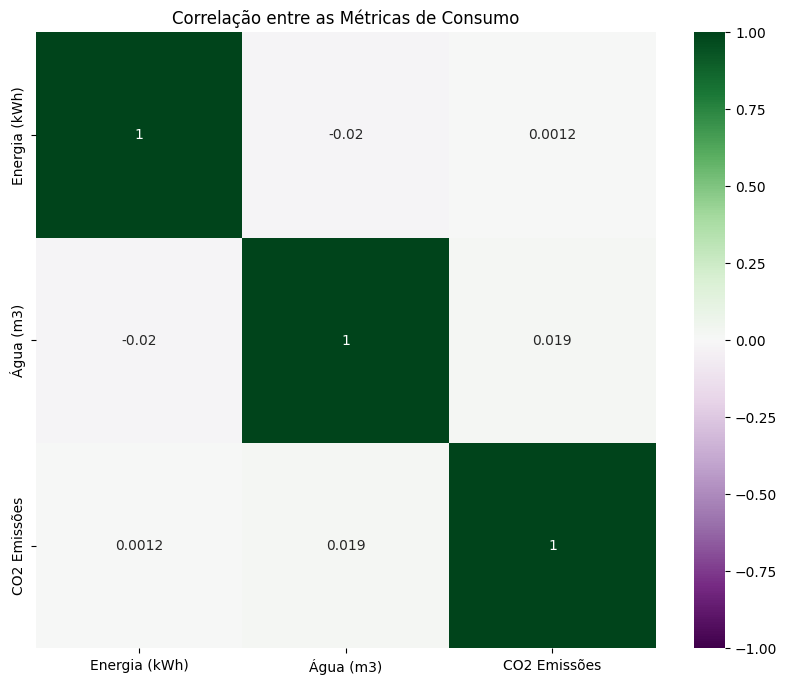


=== Detecção de Outliers ===

Outliers em Energia (kWh):
Empty DataFrame
Columns: [Empresa, Setor, Energia (kWh)]
Index: []

Outliers em Água (m3):
Empty DataFrame
Columns: [Empresa, Setor, Água (m3)]
Index: []

Outliers em CO2 Emissões:
Empty DataFrame
Columns: [Empresa, Setor, CO2 Emissões]
Index: []

=== Comparação Estatística entre Setores ===

Teste Kruskal-Wallis para Energia (kWh):
Estatística H: 6.02
p-valor: 0.3047

Teste Kruskal-Wallis para Água (m3):
Estatística H: 2.39
p-valor: 0.7925

Teste Kruskal-Wallis para CO2 Emissões:
Estatística H: 5.32
p-valor: 0.3779


In [20]:
if __name__ == "__main__":
    # Supondo que df seja o DataFrame com os dados carregados
    print("=== Análise Original ===")
    analyze_sector_consumption(df)
    identify_top_consumers(df)

    print("\n=== Análise de Correlação ===")
    analyze_correlations(df)

    print("\n=== Detecção de Outliers ===")
    detect_outliers(df)

    print("\n=== Comparação Estatística entre Setores ===")
    compare_sectors(df)

#### Primeiras Conclusões:

* O consumo energético e as emissões de CO2 são mais elevados nos setores Retail, Indústria, Saúde e Serviços, com as empresas do setor Saúde a destacarem-se no consumo de energia e emissões de CO2;

* O consumo de água está mais concentrado nos setores Educação, Indústria e Retail, com a Educação a liderar a utilização de água;

* Não há outliers significativos nas métricas de consumo de energia, água e emissões de CO2, o que sugere uma distribuição relativamente uniforme entre as empresas;

* A análise estatística indica que não há diferenças significativas entre os setores nas três métricas analisadas, sugerindo um comportamento similar em termos de consumo de energia, água e emissões de CO2 entre os setores.

In [21]:
def analyze_distributions(df):
    metrics = ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']

    for metric in metrics:
        # Criar box plot
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Setor', y=metric, data=df, palette='viridis')
        plt.title(f'Distribuição de {metric} por Setor')
        plt.xticks(rotation=45)
        plt.show()

        # Criar scatter plot (mostra a relação entre as métricas)
        plt.figure(figsize=(12, 6))
        sns.kdeplot(df[metric], shade=True, color='darkgreen')
        plt.title(f'Distribuição de {metric}')
        plt.show()

        # Exibir resumo estatístico
        print(f"\nEstatísticas Descritivas para {metric}:")
        print(df.groupby('Setor')[metric].describe())

In [22]:
def compare_medians(df):
    metrics = ['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']

    for metric in metrics:
        print(f"\nMedianas de {metric} por setor:")
        medians = df.groupby('Setor')[metric].median().sort_values(ascending=False)
        print(medians)

        # Calcular e imprimir o intervalo interquartil (IQR)
        print(f"\nIntervalo Interquartil (IQR) de {metric} por setor:")
        iqr = df.groupby('Setor')[metric].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
        print(iqr)

=== Análise de Distribuições ===


/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




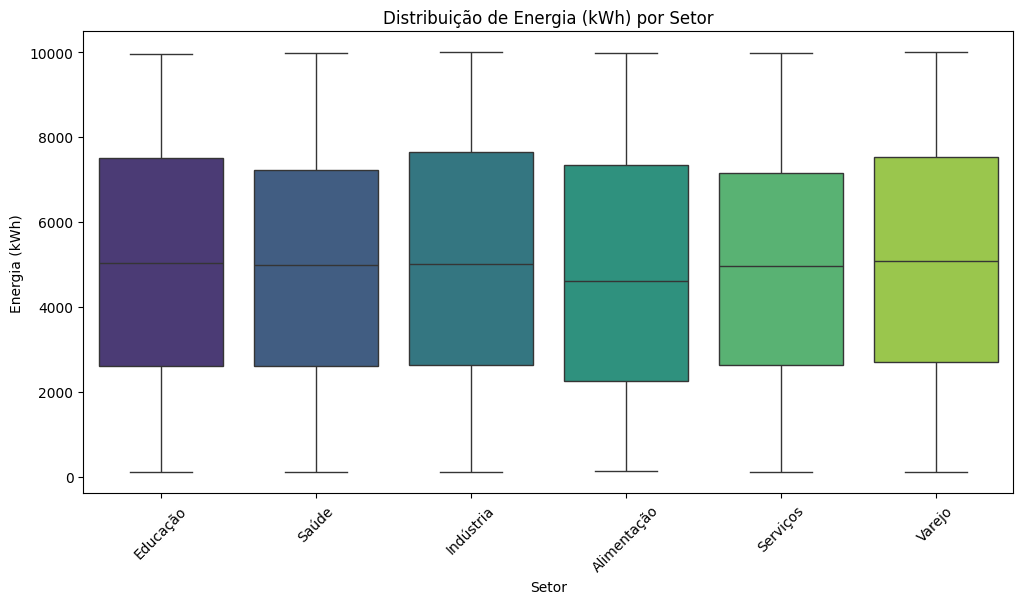

/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




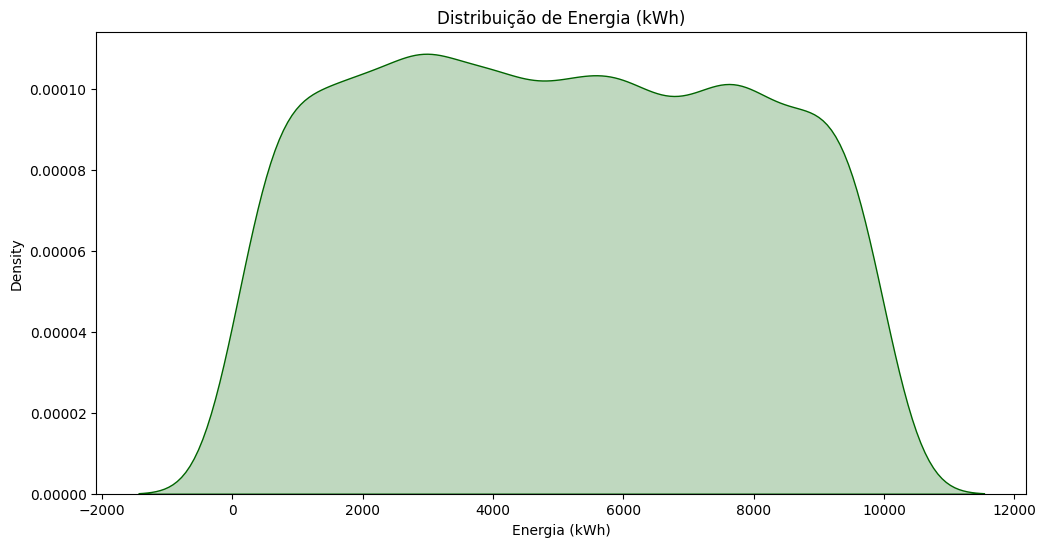


Estatísticas Descritivas para Energia (kWh):
             count         mean          std     min        25%       50%  \
Setor                                                                       
Alimentação  841.0  4820.346326  2885.328275  121.66  2261.8700  4610.110   
Educação     790.0  5012.179532  2844.455974  101.67  2601.2600  5027.935   
Indústria    849.0  5074.482214  2898.356238  102.71  2619.9300  5001.810   
Saúde        845.0  4940.869728  2786.943410  107.97  2614.3200  4985.120   
Serviços     827.0  4930.121959  2726.435084  100.62  2636.2400  4958.460   
Varejo       848.0  5113.261993  2778.831608  107.92  2698.4725  5074.025   

                  75%      max  
Setor                           
Alimentação  7347.780  9981.92  
Educação     7508.435  9958.21  
Indústria    7640.780  9993.62  
Saúde        7226.630  9986.70  
Serviços     7163.085  9968.66  
Varejo       7531.560  9993.80  


/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




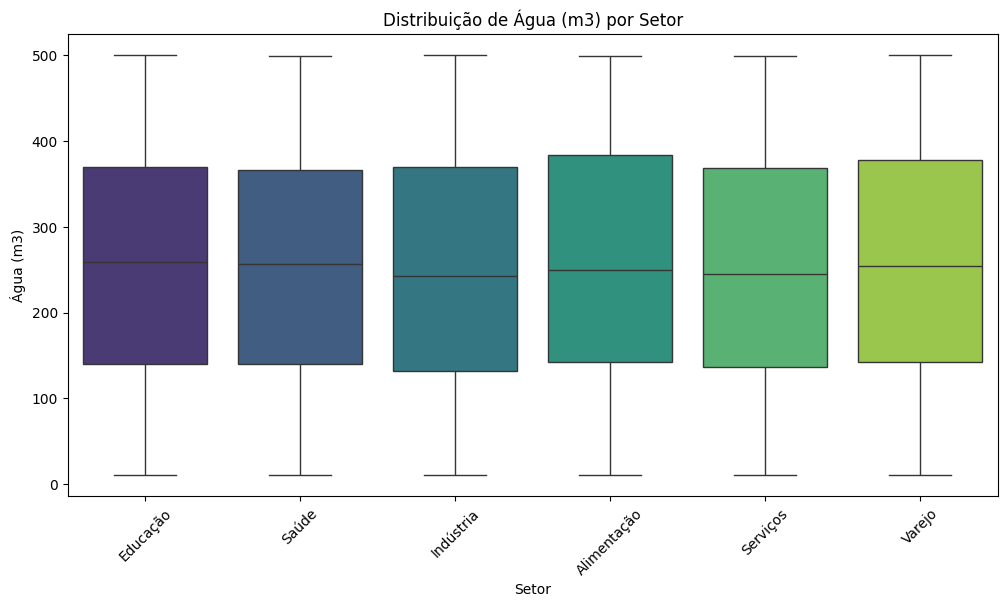

/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




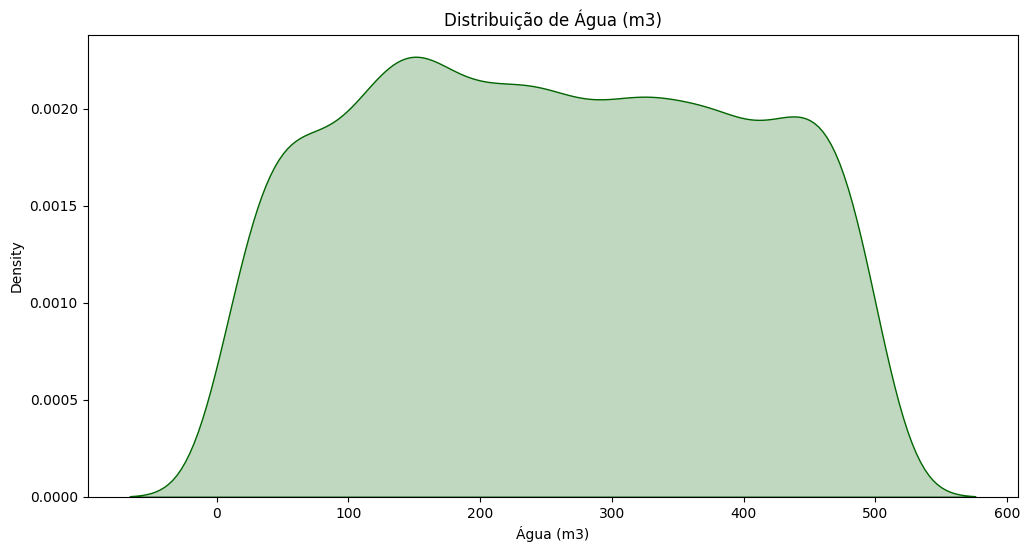


Estatísticas Descritivas para Água (m3):
             count        mean         std    min       25%      50%  \
Setor                                                                  
Alimentação  841.0  257.406468  139.009318  10.36  142.1300  249.320   
Educação     790.0  256.899063  137.090722  10.12  139.8025  259.435   
Indústria    849.0  250.109176  140.196203  10.26  132.1100  242.480   
Saúde        845.0  255.785112  139.604944  10.19  139.5700  256.930   
Serviços     827.0  250.654039  138.570054  10.68  136.2900  244.860   
Varejo       848.0  256.788302  140.902616  10.20  141.7575  253.785   

                  75%     max  
Setor                          
Alimentação  383.9600  499.63  
Educação     370.0150  499.76  
Indústria    369.8700  499.75  
Saúde        366.5000  499.59  
Serviços     367.9600  498.87  
Varejo       377.8125  499.71  


/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




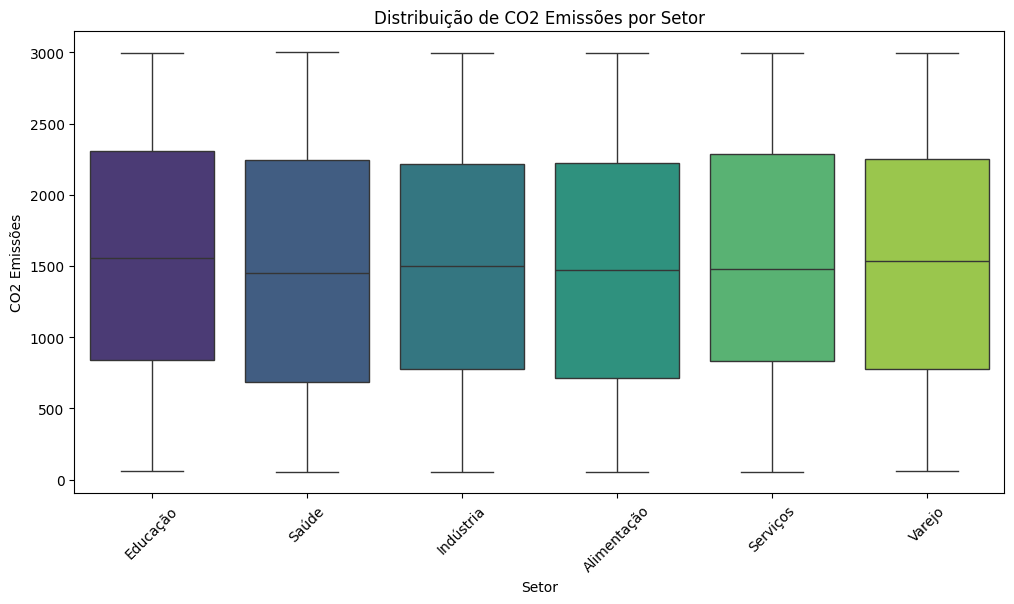

/var/folders/96/6xdzbhyj41xc8sy3w1r5r3wr0000gn/T/ipykernel_64062/890439922.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




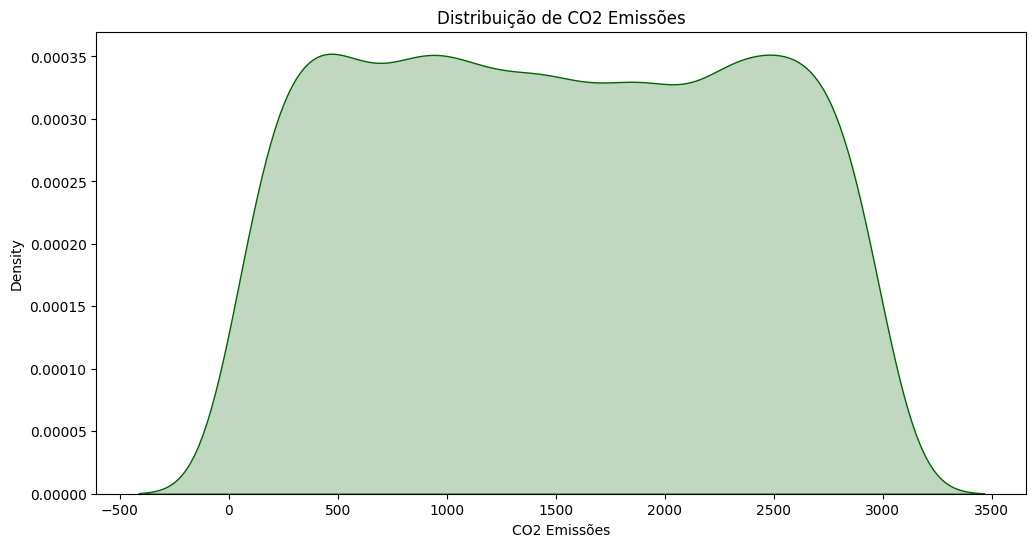


Estatísticas Descritivas para CO2 Emissões:
             count         mean         std    min       25%       50%  \
Setor                                                                    
Alimentação  841.0  1488.135993  857.579452  52.86  715.9500  1474.310   
Educação     790.0  1561.786076  839.770564  59.11  840.3300  1553.225   
Indústria    849.0  1494.268622  836.591497  51.51  776.9700  1497.820   
Saúde        845.0  1475.098225  878.297824  51.12  688.2800  1453.570   
Serviços     827.0  1517.344643  847.619766  54.51  834.3450  1480.680   
Varejo       848.0  1513.928007  836.020836  57.72  776.0725  1531.880   

                   75%      max  
Setor                            
Alimentação  2224.5900  2996.41  
Educação     2304.2100  2992.63  
Indústria    2213.1200  2992.39  
Saúde        2245.6800  2999.64  
Serviços     2288.7450  2998.64  
Varejo       2250.1175  2997.45  

=== Comparação de Medianas ===

Medianas de Energia (kWh) por setor:
Setor
Varejo        

In [23]:
if __name__ == "__main__":
    print("=== Análise de Distribuições ===")
    analyze_distributions(df)

    print("\n=== Comparação de Medianas ===")
    compare_medians(df)

### Conclusões Gerais:

*   O Retalho e a Educação apresentam, de maneira geral, os maiores valores médios e medianos de consumo de energia, água e emissões de CO2, o que pode refletir um maior volume de atividades nessas áreas.

*   O setor da Alimentação tem um consumo de energia com maior dispersão (maior desvio padrão), o que pode indicar um consumo muito variado dentro deste setor.

*   A Saúde tem as menores medianas para energia e CO2, sugerindo que este setor possui um consumo e emissões mais baixos em comparação com outros setores.

*   A Indústria apresenta um padrão de consumo de água mais uniforme, o que pode indicar uma gestão mais eficiente desse recurso.

*   Intervalo Interquartil (IQR) indica uma grande variação no consumo de energia em setores como Alimentação, enquanto o setor da Saúde apresenta uma variação mais controlada.

### Data Visualization:

### Tratamento de dados:

In [24]:
# Medidas para a energia:

# Calcular a média de energia por setor
energia_media = df.groupby('Setor')['Energia (kWh)'].mean().reset_index()

# Calcular a mediana de energia por setor
energia_mediana = df.groupby('Setor')['Energia (kWh)'].median().reset_index()

# Calcular o desvio padrão de energia por setor
energia_std = df.groupby('Setor')['Energia (kWh)'].std().reset_index()

# Calcular o intervalo interquartil (IQR)
q1 = df.groupby('Setor')['Energia (kWh)'].quantile(0.25)
q3 = df.groupby('Setor')['Energia (kWh)'].quantile(0.75)
iqr_energia = q3 - q1

# Exibir os resultados
print("Média de Energia por Setor:")
print(energia_media)
print("Mediana de Energia por Setor:")
print(energia_mediana)
print("Desvio Padrão de Energia por Setor:")
print(energia_std)
print("Intervalo Interquartil (IQR) de Energia por Setor:")
print(iqr_energia)

Média de Energia por Setor:
         Setor  Energia (kWh)
0  Alimentação    4820.346326
1     Educação    5012.179532
2    Indústria    5074.482214
3        Saúde    4940.869728
4     Serviços    4930.121959
5       Varejo    5113.261993
Mediana de Energia por Setor:
         Setor  Energia (kWh)
0  Alimentação       4610.110
1     Educação       5027.935
2    Indústria       5001.810
3        Saúde       4985.120
4     Serviços       4958.460
5       Varejo       5074.025
Desvio Padrão de Energia por Setor:
         Setor  Energia (kWh)
0  Alimentação    2885.328275
1     Educação    2844.455974
2    Indústria    2898.356238
3        Saúde    2786.943410
4     Serviços    2726.435084
5       Varejo    2778.831608
Intervalo Interquartil (IQR) de Energia por Setor:
Setor
Alimentação    5085.9100
Educação       4907.1750
Indústria      5020.8500
Saúde          4612.3100
Serviços       4526.8450
Varejo         4833.0875
Name: Energia (kWh), dtype: float64


In [25]:
# Calcular a média de água por setor
agua_media = df.groupby('Setor')['Água (m3)'].mean().reset_index()

# Calcular a mediana de água por setor
agua_mediana = df.groupby('Setor')['Água (m3)'].median().reset_index()

# Calcular o desvio padrão de água por setor
agua_std = df.groupby('Setor')['Água (m3)'].std().reset_index()

# Calcular o intervalo interquartil (IQR) para água
q1_agua = df.groupby('Setor')['Água (m3)'].quantile(0.25)
q3_agua = df.groupby('Setor')['Água (m3)'].quantile(0.75)

iqr_agua = q3_agua - q1_agua

# Exibir os resultados
print("Média de Água por Setor:")
print(agua_media)
print("Mediana de Água por Setor:")
print(agua_mediana)
print("Desvio Padrão de Água por Setor:")
print(agua_std)
print("Intervalo Interquartil (IQR) de Água por Setor:")
print(iqr_agua)

Média de Água por Setor:
         Setor   Água (m3)
0  Alimentação  257.406468
1     Educação  256.899063
2    Indústria  250.109176
3        Saúde  255.785112
4     Serviços  250.654039
5       Varejo  256.788302
Mediana de Água por Setor:
         Setor  Água (m3)
0  Alimentação    249.320
1     Educação    259.435
2    Indústria    242.480
3        Saúde    256.930
4     Serviços    244.860
5       Varejo    253.785
Desvio Padrão de Água por Setor:
         Setor   Água (m3)
0  Alimentação  139.009318
1     Educação  137.090722
2    Indústria  140.196203
3        Saúde  139.604944
4     Serviços  138.570054
5       Varejo  140.902616
Intervalo Interquartil (IQR) de Água por Setor:
Setor
Alimentação    241.8300
Educação       230.2125
Indústria      237.7600
Saúde          226.9300
Serviços       231.6700
Varejo         236.0550
Name: Água (m3), dtype: float64


In [26]:
# Calcular a média de CO2 Emissões por setor
co2_media = df.groupby('Setor')['CO2 Emissões'].mean().reset_index()

# Calcular a mediana de CO2 Emissões por setor
co2_mediana = df.groupby('Setor')['CO2 Emissões'].median().reset_index()

# Calcular o desvio padrão de CO2 Emissões por setor
co2_std = df.groupby('Setor')['CO2 Emissões'].std().reset_index()

# Calcular o intervalo interquartil (IQR) para CO2 Emissões
q1_co2 = df.groupby('Setor')['CO2 Emissões'].quantile(0.25)
q3_co2 = df.groupby('Setor')['CO2 Emissões'].quantile(0.75)

iqr_co2 = q3_co2 - q1_co2

# Exibir os resultados
print("Média de CO2 Emissões por Setor:")
print(co2_media)
print("Mediana de CO2 Emissões por Setor:")
print(co2_mediana)
print("Desvio Padrão de CO2 Emissões por Setor:")
print(co2_std)
print("Intervalo Interquartil (IQR) de CO2 Emissões por Setor:")
print(iqr_co2)

Média de CO2 Emissões por Setor:
         Setor  CO2 Emissões
0  Alimentação   1488.135993
1     Educação   1561.786076
2    Indústria   1494.268622
3        Saúde   1475.098225
4     Serviços   1517.344643
5       Varejo   1513.928007
Mediana de CO2 Emissões por Setor:
         Setor  CO2 Emissões
0  Alimentação      1474.310
1     Educação      1553.225
2    Indústria      1497.820
3        Saúde      1453.570
4     Serviços      1480.680
5       Varejo      1531.880
Desvio Padrão de CO2 Emissões por Setor:
         Setor  CO2 Emissões
0  Alimentação    857.579452
1     Educação    839.770564
2    Indústria    836.591497
3        Saúde    878.297824
4     Serviços    847.619766
5       Varejo    836.020836
Intervalo Interquartil (IQR) de CO2 Emissões por Setor:
Setor
Alimentação    1508.640
Educação       1463.880
Indústria      1436.150
Saúde          1557.400
Serviços       1454.400
Varejo         1474.045
Name: CO2 Emissões, dtype: float64


In [27]:
def analyze_sector_consumption(df, metrica):
    sector_analysis = df.groupby('Setor').agg({metrica: 'mean'}).round(2)
    fig = px.bar(sector_analysis,
                 x=sector_analysis.index,
                 y=metrica,
                 title=f'Consumo Médio de {metrica} por Setor',
                 labels={metrica: metrica.replace(' ', ' ').title()},
                 color_discrete_sequence=["darkgreen"])
    return fig

def identify_top_consumers(df, metrica):
    top_n = 5
    top_consumers = df.nlargest(top_n, metrica)[['Empresa', 'Setor', metrica]]
    
    fig = px.bar(
        top_consumers,
        x='Empresa',
        y=metrica,
        title=f'Top {top_n} Consumidores de {metrica}',
        labels={metrica: metrica.replace(' ', ' ').title()},
        color_discrete_sequence=["teal"]
    )
    
    return fig

def analyze_correlations(df):
    correlation_matrix = df[['Energia (kWh)', 'Água (m3)', 'CO2 Emissões']].corr()
    fig = px.imshow(correlation_matrix,
                    title='Correlação entre as Métricas de Consumo',
                    color_continuous_scale='PRGn')
    return fig